<a href="https://colab.research.google.com/github/hamk3010/DeepLearning/blob/master/ML-Algos/Logistic%20and%20Softmax%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

Logistic Regression is a binary classifier. If the estimated probability is less than 50% then the model predicts that the instance belongs to the "negative class (0)" and if it is greater than 50% then it predicts "positive class (1)."

> > > > >   ## $\sigma(t) =  \frac{1}{1 + e^{-t} }$




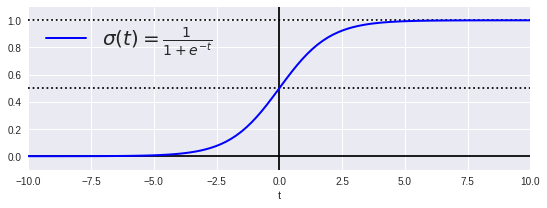

In [8]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
#  The code was uptained from:
# (https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

### Logistic Regression Model prediction function

$$
\hat y = \left\{
        \begin{array}{ll}
            0 & \quad \hat p < 0.5, \\
            1 & \quad \hat p \geq 0.5
        \end{array}
    \right.
$$


### Logistic Regression cost function

## $J(\theta) = - \frac{1}{m} \sum_{i=1}^m [ y^{(i)} log(\hat p^{(i)} ) + (1-y^{(i)}) log(1 - \hat p^{(i)} ) ] $

This cost function is concave so we are guaranteed to find a global minimum. 


In [19]:
#  Complete code is here
# https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [20]:
print([iris["feature_names"]])

[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]


In [0]:
X = iris["data"][:, 3:] ## get petal width
y = (iris["target"] == 2).astype(np.int) ##1 if Iris-Virginica, else 0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


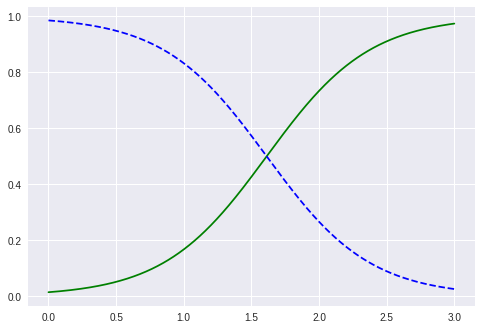

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label= "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Non Iris-Virginica")

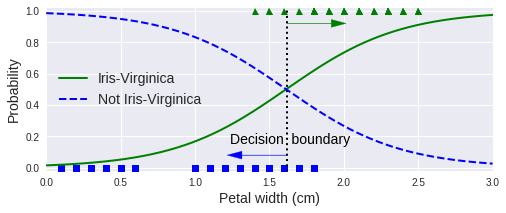

In [25]:
#@title Decision Boundary
# code from: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

As shown here, above the classifier is highly confident when the pedal width is greater than 2cm. Decision Boundary is were the classifier isn't too confident whether the flower is Iris-Virginica or Not Iris-Virginica.